In [7]:
import os
path = "/home/duy1332002/Desktop/Lip_Reading_THDH/annotations"
move_path = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_annotation"
visual_training_path = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_visual_data"
labels = []
#move file from path to move_path if folder have the name in visual_training_path
for folder in os.listdir(visual_training_path):
    if folder in os.listdir(path):
        os.rename(os.path.join(path,folder),os.path.join(move_path,folder))
        labels.append(folder)
print(len(labels))

624


In [7]:
# sort labels
labels.sort()
# save label to file
with open("label1s.txt", "w") as f:
    for label in labels:
        f.write(label + "\n")


In [1]:
import os
import numpy as np
path1 = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_visual_data"
path2 = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_annotation"
label1 = []
label2 = []
for folder in os.listdir(path1):
    label1.append(folder)
for folder in os.listdir(path2):
    label2.append(folder)
print(len(label1))
print(len(label2))
# diff of two list
diff = np.setdiff1d(label1, label2)
print(diff)


624
624
[]


/tmp/ipykernel_4361/3295651483.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data["data"]), i+1)


KeyboardInterrupt: 

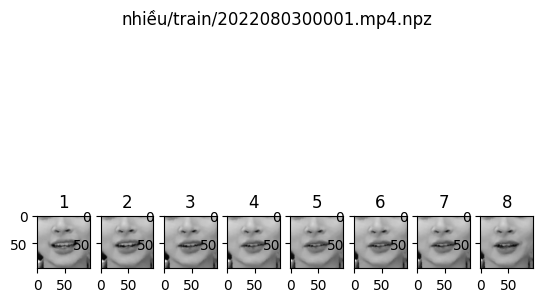

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_visual_data"
save_path = "/home/duy1332002/Desktop/Lip_Reading_THDH/check_npz"
sub_folder = ["train", "val", "test"]
sum = 0
error = []
for folder in os.listdir(path):
    for sub in sub_folder:
        for file in os.listdir(os.path.join(path, folder, sub)):
            if file.endswith(".npz"):
                data = np.load(os.path.join(path, folder, sub, file))
                for i in range(len(data["data"])):
                    plt.subplot(1, len(data["data"]), i+1)
                    plt.suptitle(os.path.join(folder, sub, file))
                    plt.title(str(i+1))
                    plt.imshow(data["data"][i], cmap="gray")
                plt.savefig(os.path.join(save_path, file + ".png"))


In [9]:
!CUDA_VISIBLE_DEVICES=0 python main.py --data-dir "train_visual_data/" --num-classes 624 --label-path "labels/labels.txt" --config-path "configs/lrw_resnet18_mstcn.json" --annonation-direc "train_annotation" --model-path "train_logs/mstcn_pretrain/2023-02-25T19:46:26/ckpt.best.pth" --training-mode "mstcn_pretrain" --allow-size-mismatch --batch-size 16 --epochs 100 --lr 1e-5  

Model and log being saved in: ./train_logs/mstcn_pretrain/2023-02-25T09:37:38
2-norm of the neural network: 46.2053
Partition train loaded
Partition val loaded
Partition test loaded
Traceback (most recent call last):
  File "/home/duy1332002/Desktop/Lip_Reading_THDH/main.py", line 303, in <module>
    main()
  File "/home/duy1332002/Desktop/Lip_Reading_THDH/main.py", line 258, in main
    model, optimizer, epoch_idx, ckpt_dict = load_model(args.model_path, model, optimizer)
  File "/home/duy1332002/Desktop/Lip_Reading_THDH/lipreading/utils.py", line 163, in load_model
    model.load_state_dict(loaded_state_dict, strict = not allow_size_mismatch)
  File "/home/duy1332002/miniconda3/envs/torch/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1671, in load_state_dict
    raise RuntimeError('Error(s) in loading state_dict for {}:\n\t{}'.format(
RuntimeError: Error(s) in loading state_dict for Lipreading:
	size mismatch for tcn.tcn_output.weight: copying a param with shape torc

In [2]:
#count file in folder
import os
path = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_visual_data"
sub_folder = ["test"]
sum = 0
for folder in os.listdir(path):
    for sub in sub_folder:
        for file in os.listdir(os.path.join(path, folder, sub)):
            if file.endswith(".npz"):
                sum += 1
print(sum)

5811


In [11]:
#count file in folder
import os
path = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_annotation"
sub_folder = ["train", "val", "test"]
sum = 0
for folder in os.listdir(path):
    for sub in sub_folder:
        for file in os.listdir(os.path.join(path, folder, sub)):
            if file.endswith(".txt"):
                sum += 1
print(sum)

56399


In [22]:
import os
path = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_annotation"
sub_folder = ["train", "val", "test"]
sum = 0
for folder in os.listdir(path):
    for sub in sub_folder:
        for file in os.listdir(os.path.join(path, folder, sub)):
            if file.endswith(".txt"):
                # rename file
                os.rename(os.path.join(path, folder, sub, file), os.path.join(path, folder, sub, file.replace(".txt", ".mp4.txt")))

In [10]:
#check file train_annotation and train_visual_data, if train_visual_data contain do not have file in train_annotation, then remove it
import os
import json
path = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_visual_data"
annotation_path = "/home/duy1332002/Desktop/Lip_Reading_THDH/train_annotation"
sub_folder = ["train", "val", "test"]
sum = 0
for folder in os.listdir(annotation_path):
    for sub in sub_folder:
        for file in os.listdir(os.path.join(annotation_path, folder, sub)):
            if file.endswith(".txt"):
                if not os.path.exists(os.path.join(path, folder, sub, file.replace(".txt", ".mp4.npz"))):
                    os.remove(os.path.join(annotation_path, folder, sub, file))
                    sum += 1
print(sum)

3232


In [5]:
# read pkl file
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = "/home/duy1332002/Desktop/Lip_Reading_THDH/models/lrw_resnet18_mstcn_video.pth/archive/data.pkl"
with open(path, "rb") as f:
    data = pickle.load(f)
    print(data.keys())
    print(data["train"]["data"].shape)
    print(data["train"]["label"].shape)


UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.